In [2]:
### This is supposed to be a demo for how to do inference using the model and a new line of text


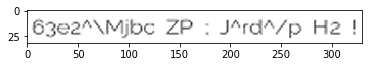

<Figure size 720x720 with 0 Axes>

63e2^\mjbc zp ; j^rd^/p h2 !


In [100]:
#General Imports
import torch
import torch.nn  as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader
import random
import matplotlib.pyplot as plt
import ctcdecode

import matplotlib.pyplot as plt
from tensorboardX import SummaryWriter

#Load fake, non handwritten generator 
from fake_texts.pytorch_dataset_fake_2 import Dataset

#Import the loss from baidu 
from torch_baidu_ctc import CTCLoss

#Import the model 
from fully_conv_model import cnn_attention_ocr

#Helper to count params
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
from evaluation import wer_eval,preds_to_integer,show,my_collate,AverageMeter

ds=Dataset()

batch_size=1
width=-1
alignment=1

ds=Dataset()

elem=ds[0]

plt.imshow(elem[0][0,:,:,:])
plt.figure(figsize=(10,10))
plt.show()
print("".join([ds.decode_dict[x] for x in elem[1][0:elem[3]]]))

In [2]:
'''plt.figure(figsize=(10,10))

elem=ds[0]
plt.imshow(elem[0][0,:,:,:])
plt.show()
print("".join([ds.decode_dict[j] for j in elem[1]] ))
ds.decode_dict'''

'plt.figure(figsize=(10,10))\n\nelem=ds[0]\nplt.imshow(elem[0][0,:,:,:])\nplt.show()\nprint("".join([ds.decode_dict[j] for j in elem[1]] ))\nds.decode_dict'

In [3]:
###Set up model. 
cnn=cnn_attention_ocr(model_dim=128,nclasses=67,n_layers=8)
cnn=cnn.eval().cpu()#.cuda()
cnn.load_state_dict(torch.load("400ksteps_augment_new_gen_e15.pt"))
#count_parameters(cnn)

In [2]:
from PIL import Image
import numpy as np
from glob import glob

In [5]:
input_folder="/home/leander/AI/data/test_seg/"

In [6]:
files=glob(input_folder+"*.png")

In [7]:
from skimage.color import gray2rgb
from skimage.transform import resize
import cv2


In [7]:
imglist=[]
for j in files:
    img = Image.open(j).convert('L')
    img=cv2.cvtColor(np.array(img),cv2.COLOR_GRAY2RGB)
    #img=np.array(img)
    #img=img.astype(float)
    img=img/255
    resize_shape=(32,int(32*img.shape[1]/img.shape[0]))
    img = resize(img,resize_shape,mode="constant")
    img=np.expand_dims(img,0)
    img=torch.tensor(img).cuda().float().permute((0,3,1,2))
    
    imglist.append(img)

In [8]:
img = Image.open("/home/leander/Pictures/test.png").convert('L')
img=cv2.cvtColor(np.array(img),cv2.COLOR_GRAY2RGB)
#img=np.array(img)
#img=img.astype(float)
img=img/255
resize_shape=(32,int(32*img.shape[1]/img.shape[0]))
img = resize(img,resize_shape,mode="constant")
img=np.expand_dims(img,0)
img=torch.tensor(img).cuda().float().permute((0,3,1,2))

#imglist.append(img)

In [3]:

#"".join(

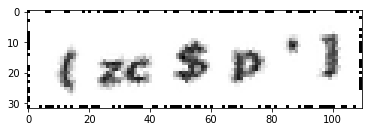

In [10]:
len(list(ds.decode_dict.values()))

67

In [11]:
import sys
sys.path.append("/home/leander/AI/repos/CTCDecoder/src")

In [12]:
from BestPath import ctcBestPath

In [13]:
from BeamSearch import ctcBeamSearch
example_image=img

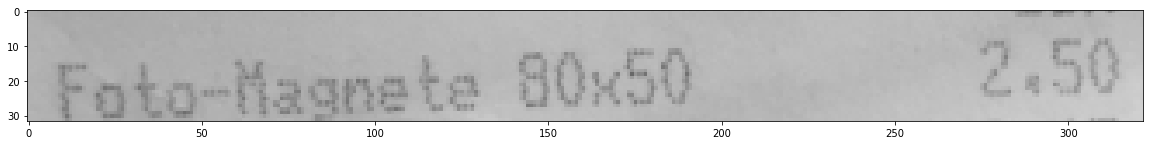

In [14]:
#example_image=example_image[:,:,:,0:750]
show(example_image.detach().cpu()[0,:,:,:])
plt.show()

In [15]:
log_probs = cnn(example_image.cpu()).permute((2,0,1))[:,0,:]
#preds_to_integer(log_probs)
"".join([ds.decode_dict[j] for j in preds_to_integer(log_probs)])

'fotq~ma9l }ete 8 ( ) x5 ( ) 2,5 ( )'

In [16]:
mat = np.array([[0.4, 0, 0.6], [0.4, 0, 0.6]])

In [17]:
log_probs=log_probs[:,0:67]

In [18]:
log_probs=torch.nn.Softmax(dim=1)(log_probs)

In [19]:
log_probs=log_probs.cpu().detach().numpy()

In [20]:
"".join(list(ds.decode_dict.values())[:-1])

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;?@[\\]^_`{|}~ '

In [21]:
"".join(list(ds.dictionary.keys()))

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;?@[\\]^_`{|}~ '

In [55]:
mat=log_probs

In [56]:
maxT, maxC = mat.shape
label = ''
classes = "".join([" "]+list(ds.dictionary.keys()))

In [63]:
"".join([" "]+list(ds.dictionary.keys())+[" "])

' abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;?@[\\]^_`{|}~ '

In [64]:
ctcBeamSearch(log_probs,"".join([" "]+list(ds.dictionary.keys())+[" "]),None)

IndexError: index 68 is out of bounds for axis 1 with size 67

In [65]:
log_probs.shape

(161, 67)

In [58]:
blankIdx = 0
lastMaxIdx = maxC

In [59]:
#'len(classes)
lastMaxIdx = maxC # init with invalid label

for t in range(maxT):
    maxIdx = np.argmax(mat[t, :])

    if maxIdx != lastMaxIdx and maxIdx != blankIdx:
        label += classes[maxIdx]

    lastMaxIdx = maxIdx

IndexError: string index out of range

In [54]:
label

'fotq~ma9l }ete 8 ( ) x5 ( ) 2,5 ( )'

In [33]:
classes[66]

' '

In [32]:
label

'fotq~ma9l }ete 8 ( ) x5 ( ) 2,5 ( )'

In [36]:
ctcBestPath(log_probs,"".join(list(ds.decode_dict.values())))

'gpur nb!mO~fufO9O)O*Oy6O)O*O3-6O)O*'

In [57]:
log_probs = cnn(example_image.cpu()).permute((2,0,1))[:,0,:]
#preds_to_integer(log_probs)
"".join([ds.decode_dict[j] for j in preds_to_integer(log_probs)])

'06/05/2017 ( upon feceipt )'

In [59]:
log_probs = cnn(example_image.cpu()).permute((2,0,1))[:,0,:]
#preds_to_integer(log_probs)
"".join([ds.decode_dict[j] for j in preds_to_integer(log_probs)])

' cu gpa,,  3.s5 cum tota|s 37 0o 37 0 ) 37 q0 924'

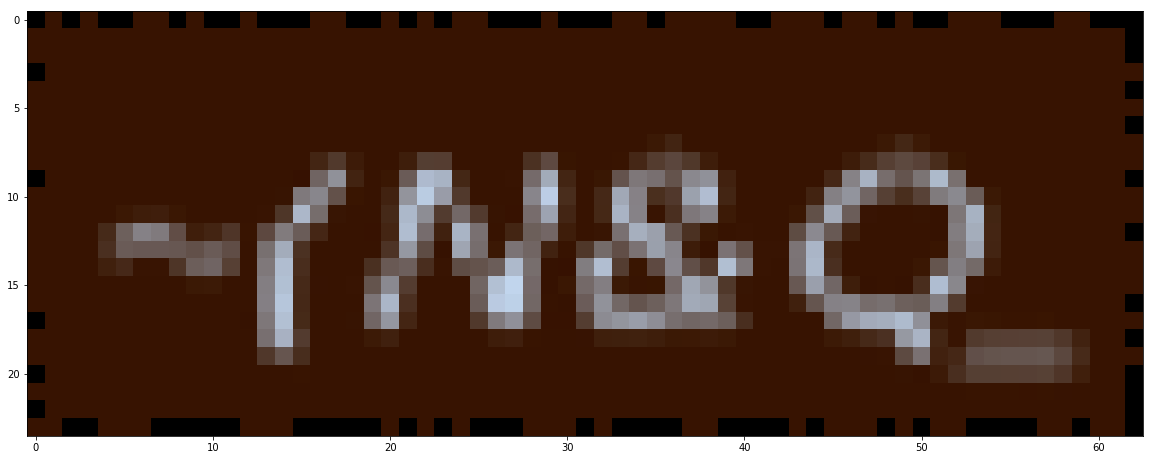

In [87]:
show(example_image.detach().cpu()[0,:,:,:])
plt.show()

In [81]:
log_probs = cnn(example_image).permute((2,0,1))[:,0,:]
#preds_to_integer(log_probs)
"".join([ds.decode_dict[j] for j in preds_to_integer(log_probs)])

'J, TN7b,q'